In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 내국인 카드 소비 데이터

In [40]:
dt_card_resident=pd.read_csv('C:/bigcontest/data/shinhan_card/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', delimiter = '\t')

In [41]:
dt_card_resident.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [42]:
dt_card_resident.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194
2537752,20200531,350,720,81,M,65,5,29


In [43]:
dt_card_resident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


In [44]:
dt_card_resident.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

# STD_DD 기준일자

In [45]:
dt_card_resident.STD_DD.unique()
dt_card_resident.STD_DD.value_counts()

20190427    11915
20190504    11903
20190309    11869
20200523    11802
20190511    11800
            ...  
20200315     8031
20200308     7882
20200223     7834
20200301     7625
20190205     6710
Name: STD_DD, Length: 241, dtype: int64

# GU_CD 구 코드

140 - 서울 중구  
350 - 서울 노원구  
110 - 대구 중구  
260 - 대구 수성구

In [46]:
dt_card_resident.GU_CD.unique()
dt_card_resident.GU_CD.value_counts()

350    761412
260    746820
140    667106
110    362415
Name: GU_CD, dtype: int64

# DONG_CD 동 코드

In [47]:
dt_card_resident.DONG_CD.unique()
dt_card_resident.DONG_CD.value_counts()

670    144986
640    127335
550    108809
680    105980
540    103374
570     97804
595     94899
580     94525
520     91711
590     89509
625     81089
630     80088
560     69696
665     62836
565     60065
650     57814
695     53205
575     49697
600     48723
605     48695
545     44764
615     43799
690     43572
651     41552
619     39166
621     38954
611     38483
624     37937
510     36796
635     36593
602     35544
561     33169
700     32201
610     32091
620     30731
652     30579
720     29328
710     29018
517     28247
530     27521
645     26585
612     24990
662     24352
661     23441
601     21333
585     19767
660     16400
Name: DONG_CD, dtype: int64

# MCT_CAT_CD 업종코드

In [48]:
dt_card_resident.MCT_CAT_CD.unique()
dt_card_resident.MCT_CAT_CD.value_counts()

40    326560
80    326471
81    291322
70    280001
71    211651
21    158288
33    143343
50    122479
62    111545
22     99595
42     94797
92     70101
20     67506
10     58095
44     50400
52     29515
35     26769
34     24659
32     16120
43     13810
60      6666
30      6102
31      1958
Name: MCT_CAT_CD, dtype: int64

# SEX_CD 성별 코드

In [49]:
dt_card_resident.SEX_CD.unique()
dt_card_resident.SEX_CD.value_counts()

M    1295256
F    1242497
Name: SEX_CD, dtype: int64

# AGE_CD 나이 코드

In [50]:
dt_card_resident.AGE_CD.unique()
dt_card_resident.AGE_CD.value_counts()

45    287695
50    280996
40    269982
25    264405
35    263903
30    256633
55    252090
65    221656
60    220820
20    219573
Name: AGE_CD, dtype: int64

# USE_CNT 이용건수

In [51]:
dt_card_resident.USE_CNT.unique()
dt_card_resident.USE_CNT.value_counts()

5        469236
9        164783
11       143280
4         82974
6         80148
          ...  
15402         1
7214          1
5167          1
23589         1
6147          1
Name: USE_CNT, Length: 7507, dtype: int64

In [52]:
dt_card_resident.groupby('AGE_CD')['USE_AMT'].sum()

AGE_CD
20    345604059
25    746116992
30    726108683
35    790366967
40    756676736
45    882011212
50    793963553
55    596300453
60    430390045
65    495977349
Name: USE_AMT, dtype: int64

In [53]:
dt_card_resident.groupby('SEX_CD')['USE_AMT'].sum()

SEX_CD
F    3289378278
M    3274137771
Name: USE_AMT, dtype: int64

In [54]:
dt_card_resident.groupby(['SEX_CD','AGE_CD','MCT_CAT_CD'])['USE_AMT'].count()

SEX_CD  AGE_CD  MCT_CAT_CD
F       20      10             2873
                20             2011
                21             9581
                22             6348
                30              109
                              ...  
M       65      70            14554
                71             8383
                80            16219
                81            14459
                92             2085
Name: USE_AMT, Length: 460, dtype: int64

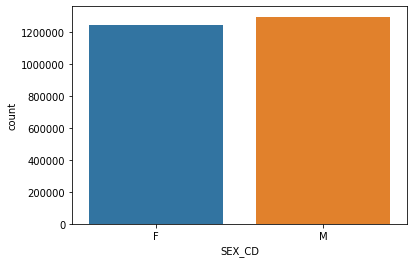

In [55]:
sns.countplot(dt_card_resident['SEX_CD'])
plt.show()

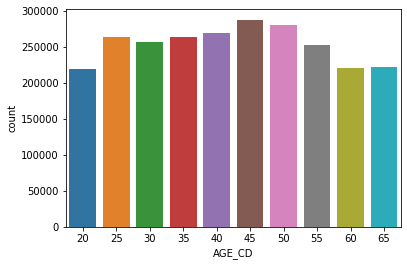

In [56]:
sns.countplot(dt_card_resident['AGE_CD'])
plt.show()

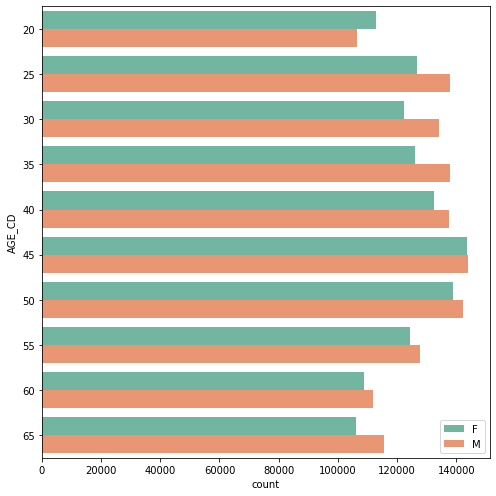

In [57]:
plt.figure(figsize=(7, 7))
sns.countplot(y = dt_card_resident['AGE_CD'], palette="Set2", hue=dt_card_resident['SEX_CD'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

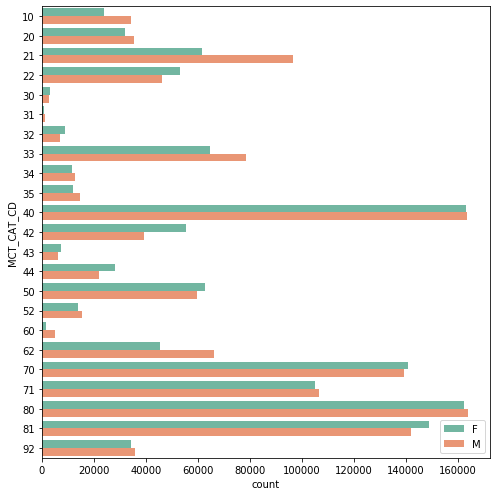

In [58]:
plt.figure(figsize=(7, 7))
sns.countplot(y = dt_card_resident['MCT_CAT_CD'], palette="Set2", hue=dt_card_resident['SEX_CD'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

## 위 그래프에서 21법 업종을 이용하는 남성의 수가 많은것을 알 수 있음

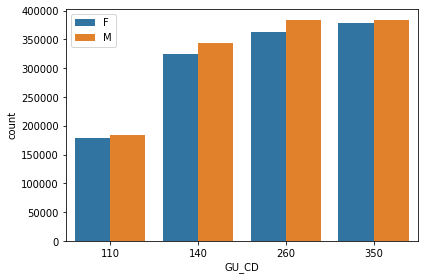

In [59]:
sns.countplot(dt_card_resident['GU_CD'], hue=dt_card_resident['SEX_CD'])
plt.legend(loc=2)
plt.tight_layout()
plt.show()

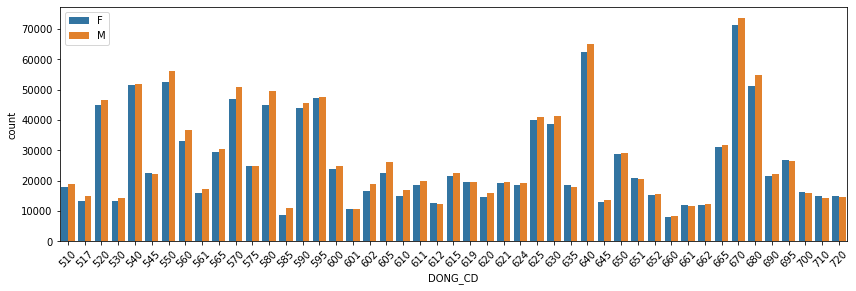

In [60]:
plt.figure(figsize=(12, 4))
sns.countplot(dt_card_resident['DONG_CD'], hue=dt_card_resident['SEX_CD'])
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [61]:
dt_card_resident[dt_card_resident['MCT_CAT_CD'] == 21].AGE_CD

7          50
8          20
9          25
10         30
11         35
           ..
2537639    20
2537640    25
2537641    30
2537642    50
2537643    55
Name: AGE_CD, Length: 158288, dtype: int64

In [62]:
dt_card_resident[(dt_card_resident['MCT_CAT_CD'] == 21) & (dt_card_resident['SEX_CD'] == 'M')]

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
8,20190201,110,517,21,M,20,5,43
9,20190201,110,517,21,M,25,16,103
10,20190201,110,517,21,M,30,11,184
11,20190201,110,517,21,M,35,27,622
12,20190201,110,517,21,M,40,11,238
...,...,...,...,...,...,...,...,...
2537639,20200531,350,720,21,M,20,14,178
2537640,20200531,350,720,21,M,25,9,360
2537641,20200531,350,720,21,M,30,5,56
2537642,20200531,350,720,21,M,50,5,168


In [63]:
data_21M = dt_card_resident[(dt_card_resident['MCT_CAT_CD'] == 21) & (dt_card_resident['SEX_CD'] == 'M')]

### 21번 업종을 이용한 남성의 나이별 사용 금액

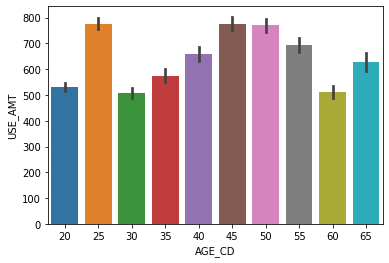

In [64]:
sns.barplot(data = data_21M, x='AGE_CD', y='USE_AMT')
plt.show()

### 21번 업종을 이용한 남성의 나이별 이용 횟수

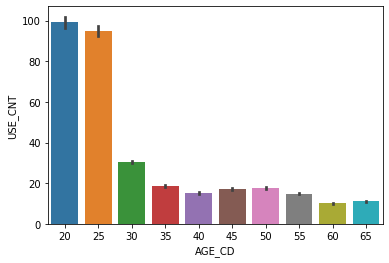

In [65]:
sns.barplot(data = data_21M, x='AGE_CD', y='USE_CNT')
plt.show()

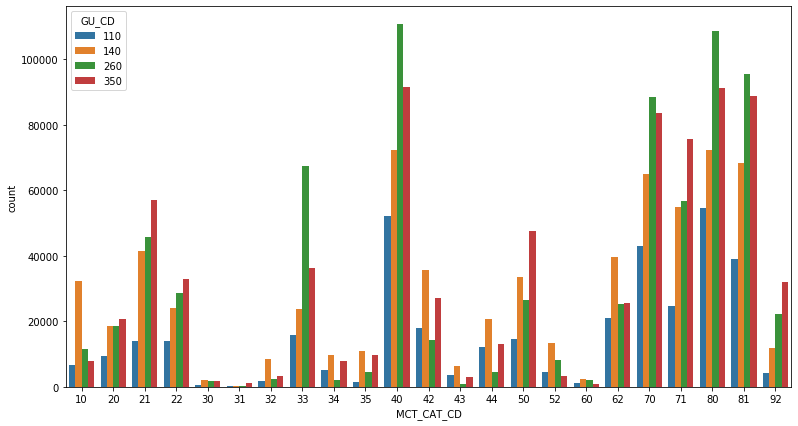

In [66]:
plt.figure(figsize=(13, 7))
sns.countplot(dt_card_resident['MCT_CAT_CD'], hue=dt_card_resident['GU_CD'])
plt.show()

140 - 서울 중구(주황)  
350 - 서울 노원구(빨강)  
110 - 대구 중구(파랑)  
260 - 대구 수성구(초록)

#### 눈에 띄게 높은 260(대구 수성구)의 40번 업종(유통업)을 분석해보도록 한다

## 대구 수성구의 40업종 (유통업) 분석

In [67]:
dt_card_resident[(dt_card_resident['MCT_CAT_CD'] == 40) & (dt_card_resident['GU_CD'] == 260)]

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
4620,20190201,260,510,40,F,20,108,474
4621,20190201,260,510,40,F,25,130,1122
4622,20190201,260,510,40,F,30,124,816
4623,20190201,260,510,40,F,35,119,3357
4624,20190201,260,510,40,F,40,206,4651
...,...,...,...,...,...,...,...,...
2534616,20200531,260,690,40,M,45,525,9365
2534617,20200531,260,690,40,M,50,585,10314
2534618,20200531,260,690,40,M,55,399,7956
2534619,20200531,260,690,40,M,60,246,3177


In [68]:
data_40260 = dt_card_resident[(dt_card_resident['MCT_CAT_CD'] == 40) & (dt_card_resident['GU_CD'] == 260)]

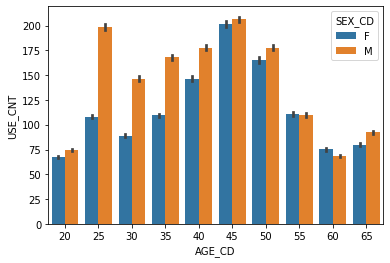

In [69]:
sns.barplot(data = data_40260, x='AGE_CD', y='USE_CNT', hue=dt_card_resident['SEX_CD'])
plt.show()

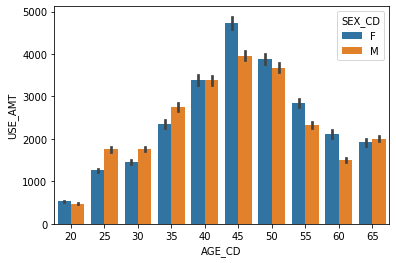

In [70]:
sns.barplot(data = data_40260, x='AGE_CD', y='USE_AMT', hue=dt_card_resident['SEX_CD'])
plt.show()

대구 수성구의 25-45세 사이의 여성들이 이용하는 횟수는 많지만 금액은 남성과 큰 차이가 없다는것을 알 수 있다.  
45-50 사이의 남성들이 사용하는 금액의 크기가 크다는 것을 알 수 있다.

# 외국인 카드 소비 데이터

In [71]:
dt_card_foreigner=pd.read_csv('C:/bigcontest/data/shinhan_card/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt', encoding='euc-kr', delimiter = '\t')

In [72]:
dt_card_foreigner.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [73]:
dt_card_foreigner.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,20200516,350,640,71,오스트레일리아,1,39.0
238828,20200522,350,595,33,오스트레일리아,1,50.0


In [74]:
dt_card_foreigner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238829 entries, 0 to 238828
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STD_DD      238829 non-null  int64  
 1   GU_CD       238829 non-null  int64  
 2   DONG_CD     238829 non-null  int64  
 3   MCT_CAT_CD  238829 non-null  int64  
 4   COUNTRY_NM  238829 non-null  object 
 5   USE_CNT     238829 non-null  int64  
 6   USE_AMT     238826 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 12.8+ MB


In [75]:
dt_card_foreigner.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
COUNTRY_NM    0
USE_CNT       0
USE_AMT       3
dtype: int64

In [76]:
dt_card_foreigner[dt_card_foreigner['USE_AMT'].isnull()]

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
159857,20200422,140,540,40,대만,1,NaN
223832,20200527,140,540,40,대만,1,NaN
234647,20200423,140,540,40,대만,6,NaN


USE_AMT에 NULL값이 존재하므로 NULL값 처리하는 방법 고안

## STD_DD 기준일자

In [83]:
dt_card_foreigner.STD_DD.unique()
dt_card_foreigner.STD_DD.value_counts()

20190504    1524
20190503    1505
20190427    1502
20190406    1500
20190413    1498
            ... 
20200419     472
20200329     467
20200322     463
20200405     462
20200315     455
Name: STD_DD, Length: 241, dtype: int64

## GU_CD 구코드

In [84]:
dt_card_foreigner.GU_CD.unique()
dt_card_foreigner.GU_CD.value_counts()

140    149997
110     31849
350     30779
260     26204
Name: GU_CD, dtype: int64

## DONG_CD 행정동코드

In [85]:
dt_card_foreigner.DONG_CD.unique()
dt_card_foreigner.DONG_CD.value_counts()

550    33948
540    22757
590    22075
520    20551
570    12492
565    11855
605     9886
580     9428
615     7760
680     7742
640     7434
670     6451
545     6193
575     5860
665     5398
625     5022
600     4838
595     4156
510     3850
560     2752
650     2523
635     2446
695     2317
611     2200
630     2102
517     1350
645     1321
610     1298
620     1295
621     1274
602     1187
530     1115
651     1067
619      953
690      897
585      653
624      631
561      562
652      516
661      465
720      413
601      386
710      342
700      300
612      297
660      244
662      227
Name: DONG_CD, dtype: int64

## MCT_CAT_CD 업종코드

In [86]:
dt_card_foreigner.MCT_CAT_CD.unique()
dt_card_foreigner.MCT_CAT_CD.value_counts()

80    49982
40    49693
10    23817
81    20305
71    15963
42    15805
70    13892
44    10335
20     7961
52     6083
50     5777
22     4781
62     4535
21     2807
43     2107
34     1368
33      975
92      960
35      773
32      589
60      162
30      145
31       14
Name: MCT_CAT_CD, dtype: int64

## COUNTRY_NM 외국인 국가명

In [91]:
dt_card_foreigner.COUNTRY_NM.unique()
dt_card_foreigner.COUNTRY_NM.value_counts()

미국         51570
일본         24936
유럽         23703
중국         22320
미주         17692
아시아        15814
대만         13894
영국         12866
홍콩         10946
싱가폴         9660
중동/아프리카     8645
태국          7694
필리핀         6185
베트남         5271
프랑스         1346
독일          1321
캐나다         1119
오스트레일리아      943
카자흐스탄        773
정보없음         698
러시아          637
스웨덴          539
네덜란드         257
Name: COUNTRY_NM, dtype: int64

## USE_CNT 이용건수

In [89]:
dt_card_foreigner.USE_CNT.unique()
dt_card_foreigner.USE_CNT.value_counts()

1       81712
2       40053
3       16711
4       13914
5        7962
        ...  
1348        1
2885        1
836         1
2629        1
1088        1
Name: USE_CNT, Length: 1546, dtype: int64

## USE_AMT 이용금액

In [90]:
dt_card_foreigner.USE_AMT.unique()
dt_card_foreigner.USE_AMT.value_counts()

5.0        4549
6.0        3943
4.0        3859
3.0        3801
10.0       3732
           ... 
5665.0        1
6894.0        1
15323.0       1
13879.0       1
32767.0       1
Name: USE_AMT, Length: 19697, dtype: int64

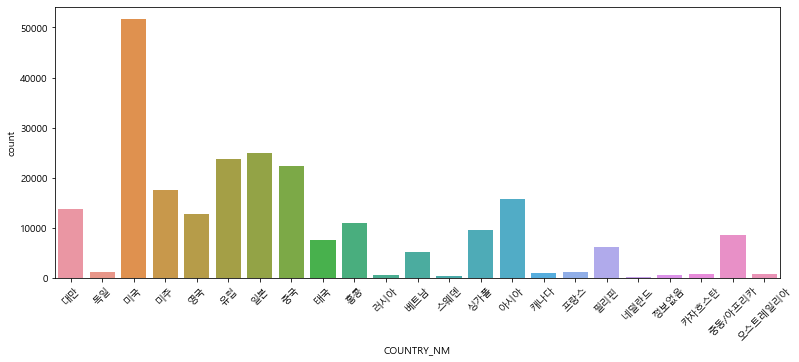

In [101]:
plt.figure(figsize=(13,5))
sns.countplot(data=dt_card_foreigner, x='COUNTRY_NM')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xticks(rotation=45)
plt.show()

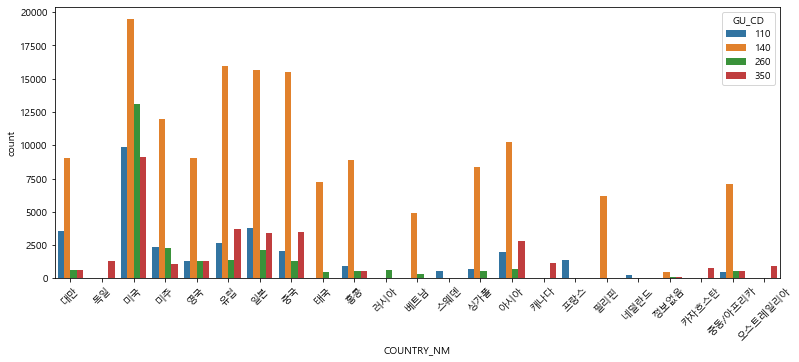

In [102]:
plt.figure(figsize=(13,5))
sns.countplot(data=dt_card_foreigner, x='COUNTRY_NM', hue='GU_CD')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xticks(rotation=45)
plt.show()

140 - 서울 중구(주황)  
350 - 서울 노원구(빨강)  
110 - 대구 중구(파랑)  
260 - 대구 수성구(초록)